In [16]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

Функция для LU-разложения матрицы

In [17]:
def decompose_to_LU(a):
    """
    Выполняет LU-разложение матрицы a.
    
    Параметры:
    a - квадратная матрица, которую нужно разложить на LU.
    
    Возвращает:
    Матрицу lu, содержащую как нижнюю (L), так и верхнюю (U) треугольные матрицы.
    """
    # Инициализация нулевой матрицы для хранения LU-разложения
    lu = np.matrix(np.zeros([a.shape[0], a.shape[1]]))
    n = a.shape[0]  # Размерность матрицы a

    # Заполнение матрицы LU
    for k in range(n):
        # Вычисление элементов верхней треугольной матрицы U
        for j in range(k, n):
            lu[k, j] = a[k, j] - lu[k, :k] * lu[:k, j]
        # Вычисление элементов нижней треугольной матрицы L
        for i in range(k + 1, n):
            lu[i, k] = (a[i, k] - lu[i, :k] * lu[:k, k]) / lu[k, k]

    return lu


Функция для решения системы уравнений с использованием LU-разложения

In [18]:
def solve(lu, b):
    """
    Решает систему линейных уравнений Ax = b с использованием LU-разложения.
    
    Параметры:
    lu - матрица, содержащая LU-разложение матрицы A.
    b - вектор свободных членов.
    
    Возвращает:
    Вектор x, являющийся решением системы.
    """
    n = lu.shape[0]
    y = np.zeros([n, 1])
    x = np.zeros([n, 1])

    # Решение системы Ly = b методом прямой подстановки
    for i in range(n):
        y[i] = b[i] - np.dot(lu[i, :i], y[:i])

    # Решение системы Ux = y методом обратной подстановки
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(lu[i, i+1:], x[i+1:])) / lu[i, i]

    return np.matrix(x)

Функция для построения полинома методом наименьших квадратов

In [19]:
def fun(m, x, y):
    """
    Строит полином степени m методом наименьших квадратов.
    
    Параметры:
    m - степень полинома.
    x - массив значений x.
    y - массив значений y.
    
    Возвращает:
    Коэффициенты полинома a, строковое представление полинома polinom, матрицу phi.
    """
    # Создание матрицы Вандермонда phi
    phi = np.zeros((len(x), m+1))
    phi[:,] = 1
    for i in range(m+1):
        phi[:, i] = x**(i)

    # Транспонирование матрицы phi
    phi_T = phi.T

    # Вычисление матрицы phi_T * phi
    phi_T_phi = np.dot(phi_T, phi)

    # LU-разложение матрицы phi_T * phi
    lu = decompose_to_LU(phi_T_phi)

    # Вычисление матрицы phi_T * y
    phi_T_y = np.dot(phi_T, y)

    # Решение системы для нахождения коэффициентов полинома a
    a = solve(lu, phi_T_y)

    # Формирование строкового представления полинома
    polinom = f""
    for i in range(m + 1):
        if i == 0:
            polinom += f"{a[i, 0]:.4f}"
        else:
            polinom += f" + {a[i, 0]:.4f} * x^{i}"

    return a, polinom, phi



Входные данные

In [20]:
x = np.array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1])
y = np.array([100.01, 4.250, 2.0446, 2.2817, 3.236, 4.6368])

Найдем полиномы

In [21]:
A1, pol1, phi1 = fun(1, x, y)
A2, pol2, phi2 = fun(2, x, y)

print("Полином первой степени", pol1)
print("Полином второй степени", pol2)

Полином первой степени 57.0983 + -34.2622 * x^1
Полином второй степени 98.4497 + -156.6477 * x^1 + 55.6298 * x^2


C:\Users\mmaxi\AppData\Local\Temp\ipykernel_12496\4139394123.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lu[k, j] = a[k, j] - lu[k, :k] * lu[:k, j]
C:\Users\mmaxi\AppData\Local\Temp\ipykernel_12496\4139394123.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lu[i, k] = (a[i, k] - lu[i, :k] * lu[:k, k]) / lu[k, k]


Построим графики

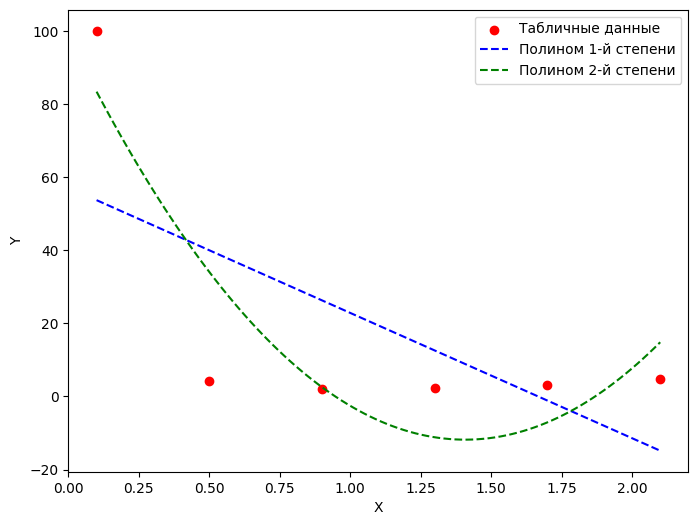

In [22]:
# Построение графиков
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, color='red', label='Табличные данные')

# Линия для полинома первой степени
x_line = np.linspace(min(x), max(x), 100)
y_line = A1[0,0] + A1[1,0] * x_line
ax.plot(x_line, y_line, 'b--', label='Полином 1-й степени')

# Линия для полинома второй степени
y_poly = A2[0,0] + A2[1,0] * x_line + A2[2,0] * x_line**2
ax.plot(x_line, y_poly, 'g--', label='Полином 2-й степени')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

plt.show()


Сумма квадратов ошибок

In [23]:
# Функция для вычисления суммы квадратов ошибок
def er(phi, a, y):
    """
    Вычисляет сумму квадратов ошибок между предсказанными и реальными значениями.
    
    Параметры:
    phi - матрица Вандермонда.
    a - вектор коэффициентов полинома.
    y - вектор реальных значений.
    
    Возвращает:
    Сумму квадратов ошибок.
    """
    phi_a = np.dot(phi, a)
    norm = np.linalg.norm((phi_a - y.reshape(-1, 1)))**2
    return norm

In [24]:
# Вычисление и вывод суммы квадратов ошибок для полиномов первой и второй степени
print("Сумма квадратов ошибки для 1 степени:", er(phi1, A1, y))
print("Сумма квадратов ошибки для 2 степени:", er(phi2, A2, y))

Сумма квадратов ошибки для 1 степени: 4514.050344914859
Сумма квадратов ошибки для 2 степени: 1556.3690964405716


Полученные ошибки и график сначала испугали меня, и я подумала, что я допустила где-то ошибку. Но внимательно проанализировав результаты, можно сделать вывод, что полиндромы пытаются аппроксимировать приближаемую функцию, но первая точка со значением 100.01 очень сильно "выбивается" от остальных.

Как и ожидалось, полином второй степени лучше аппроксимирует данные, что и приводит к меньшей сумме квадратов ошибок.